## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import collections as co
import statistics as st

from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from matplotlib import ticker
import matplotlib.pyplot as plt


## Đọc dữ liệu từ file

In [8]:
df = pd.read_csv('E:\Learn\Bussiness Analyst\IS403.N21.HTTT_Nhom13\Dataset\CTLT.csv')


In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-07,109.879997,113.489998,109.559998,112.750000,112.750000,750900
1,2022-04-08,112.669998,113.180000,110.419998,110.709999,110.709999,957300
2,2022-04-11,109.580002,110.000000,106.610001,107.050003,107.050003,820400
3,2022-04-12,105.980003,107.099998,99.589996,100.059998,100.059998,1824800
4,2022-04-13,99.769997,101.919998,99.769997,100.879997,100.879997,875500
...,...,...,...,...,...,...,...
246,2023-03-31,65.080002,66.000000,64.510002,65.709999,65.709999,1069900
247,2023-04-03,64.650002,65.059998,62.459999,62.919998,62.919998,1708200
248,2023-04-04,63.000000,63.740002,62.220001,62.250000,62.250000,1435100
249,2023-04-05,61.599998,62.430000,61.060001,61.619999,61.619999,1471200


## Phân tích dữ liệu

In [10]:
print("Information of Close Price")
print("Number Of Lines: ", len(df.Close))
print(f"Maximum: {max(df.Close)}")
print(f"Minimum: {min(df.Close)}")
print(f"Average: {st.mean(df.Close)}")
print(f"Median: {st.median(df.Close)}")

freq_table = co.Counter(df.Close)
max_freq = max(freq_table.values())
mode_values = [k for k, v in freq_table.items() if v == max_freq]
print("Mode: ", mode_values)

quantile = [np.percentile(df.Close, 25), np.percentile(df.Close, 50), np.percentile(df.Close, 75)]
print("Quantile: ", quantile)

print("Variance: ", st.variance(df.Close))
print("Standard deviation: ", st.stdev(df.Close))
print("Coefficient of Variation: ", st.stdev(df.Close))
print("Coefficient of Skewness: ", df.Close.skew())
print("Coefficient of Kurtosis: ", df.Close.kurtosis())

Information of Close Price
Number Of Lines:  251
Maximum: 113.709999
Minimum: 41.389999
Average: 78.59071703984064
Median: 74.730003
Mode:  [92.279999, 102.510002, 109.610001, 89.279999, 47.18, 48.18]
Quantile:  [55.385000000000005, 74.730003, 101.66500099999999]
Variance:  562.659120430201
Standard deviation:  23.72043676727309
Coefficient of Variation:  23.72043676727309
Coefficient of Skewness:  -0.10026713001592626
Coefficient of Kurtosis:  -1.4125529472465956


### Trực quan hóa dữ liệu

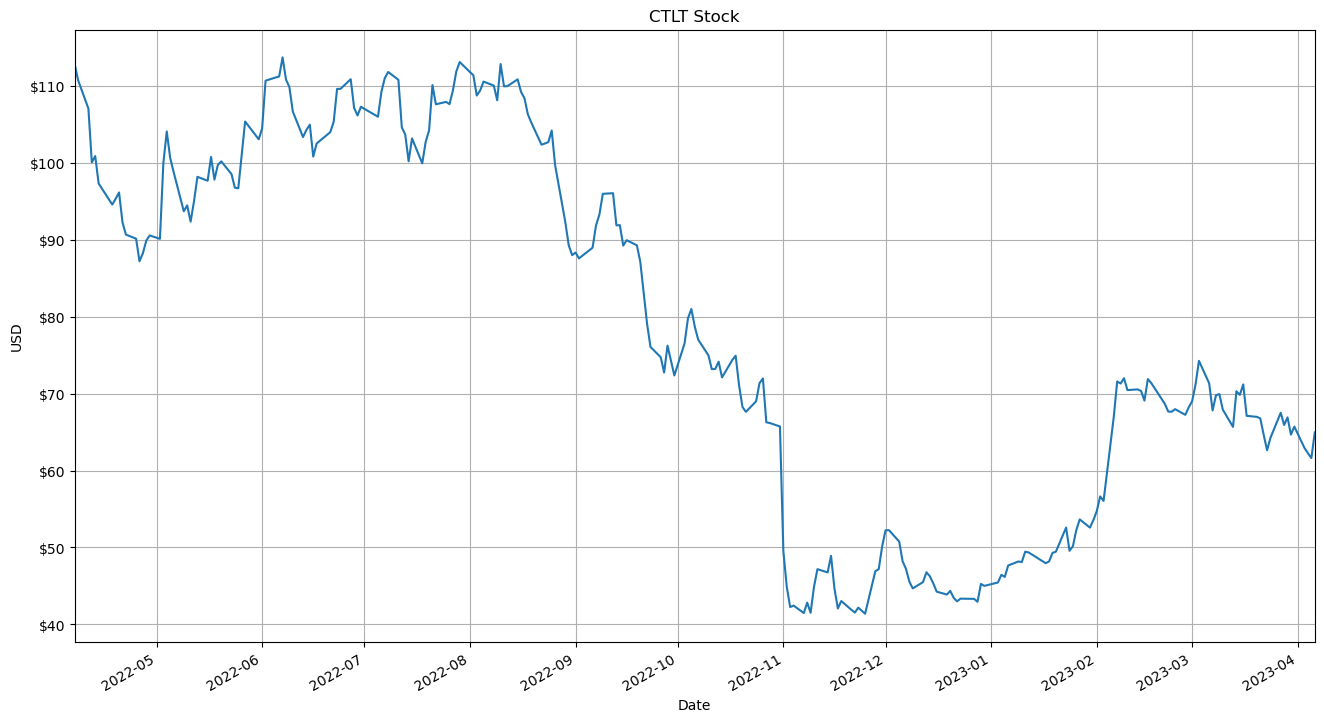

In [11]:
# Chuyển đổi kiểu dữ liệu của cột Date sang datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột Date làm index của DataFrame
df.set_index('Date', inplace=True)

# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')
title = 'CTLT Stock'
ylabel = 'USD'
xlabel = 'Date'

# Vẽ biểu đồ theo index của DataFrame
ax = df['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

# Hiển thị biểu đồ
plt.show()

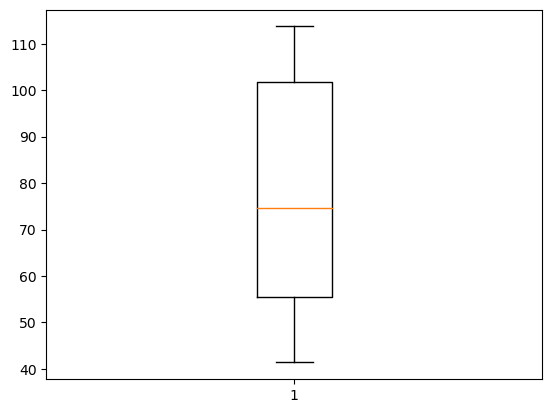

In [12]:
plt.boxplot(df.Close)
plt.show()

## Xây dựng mô hình

### Xử lý dữ liệu

In [13]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

### Chia tập train, test, validation

In [14]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [15]:
!pip install pmdarima

     -------------------------------------- 569.7/569.7 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 988.4/988.4 kB 9.0 MB/s eta 0:00:00


In [16]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=863.412, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=859.811, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=860.346, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=864.576, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=861.456, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=861.461, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=863.428, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=860.026, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.570 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [17]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [18]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[44.86761015 44.46118999 44.06826591 43.67773948 43.28763901 42.89761422
 42.50760286 42.1175939  41.72758536 41.3375769  40.94756845 40.55756
 40.16755155 39.7775431  39.38753466 38.99752621 38.60751776 38.21750932
 37.82750087 37.43749242 37.04748397 36.65747553 36.26746708 35.87745863
 35.48745018 35.09744174 34.70743329 34.31742484 33.9274164  33.53740795]


In [19]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

#MLSE

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 27.17276711717421
Testing RMSE: 25.763296053040193


Validation RMSE: 27.17276711717421
Testing RMSE: 25.763296053040193


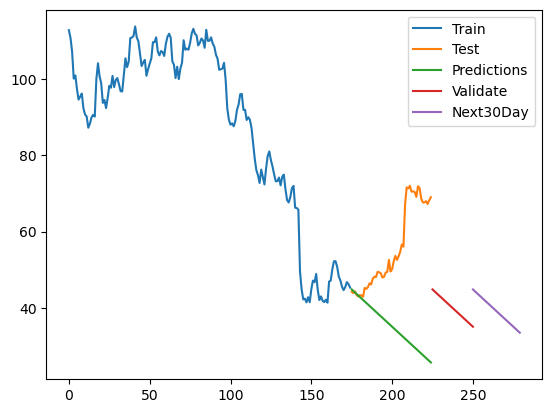

In [21]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [22]:
test_data.index

RangeIndex(start=175, stop=225, step=1)